In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
csv_path = "/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/validation/validation_full_log_agent12.csv"
agent_results_df = pd.read_csv(csv_path)

In [29]:
# Set 'Step' as the index
agent_results_df = agent_results_df.set_index('Step')

# Scale the 'EffRatio' column by multiplying it by 3
agent_results_df['EffRatio'] = agent_results_df['EffRatio'] * 3
agent_results_df['Energy'] = agent_results_df['Energy']*-0.02

# Display the updated DataFrame (all columns should remain intact)
agent_results_df.head()


,ActionIndex,DemandScale,Reward,EffRatio,ValidHeadsRatio,Energy,Q_0,Q_1,Q_2,Q_3,...,Head_16,Head_17,Head_18,PumpGroupSpeed_1,PumpGroupSpeed_2,PumpPower_10,PumpPower_17,PumpPower_25,PumpPower_26,PumpPower_27
Step,,,,,,,,,,,,,,,,,,,,,
0,124,1.045781,0.528948,1.293112,0.991393,-1.755557,325677184.0,336637632.0,337657088.0,349834560.0,...,77.931625,77.934794,77.899235,1.0,1.2,26.120316,26.089383,8.474412,8.479020,18.614718
1,124,1.026884,0.558558,1.293862,0.991393,-1.726698,388243968.0,401313984.0,402374528.0,416917888.0,...,78.035735,78.038811,78.004305,1.0,1.2,25.758565,25.728437,8.262654,8.267170,18.318055
2,124,1.009120,0.584800,1.292860,0.991393,-1.699453,389011104.0,402106912.0,403170464.0,417742432.0,...,78.132999,78.135988,78.102455,1.0,1.2,25.419104,25.389723,8.061099,8.065527,18.037210
3,124,1.011388,0.581536,1.293080,0.991393,-1.702937,389719712.0,402839392.0,403905632.0,418504032.0,...,78.120600,78.123600,78.089943,1.0,1.2,25.462458,25.432982,8.086911,8.091350,18.073168
4,124,1.002695,0.594988,1.292090,0.992469,-1.689571,389630048.0,402746656.0,403812576.0,418407584.0,...,78.168023,78.170982,78.137795,1.0,1.2,25.296511,25.267396,7.987549,7.991945,17.935161


In [30]:
agent_results_df.shape

(23, 2068)

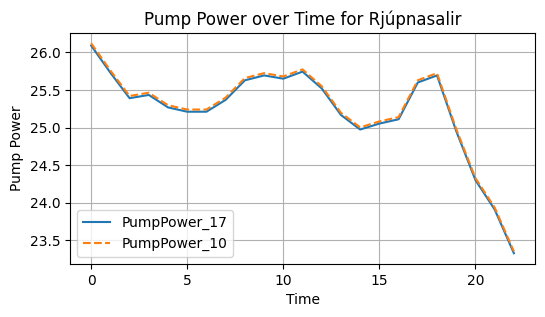

In [31]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_17'], label='PumpPower_17')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_10'], label='PumpPower_10', linestyle='--')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Pump Power")
plt.title("Pump Power over Time for Rjúpnasalir")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


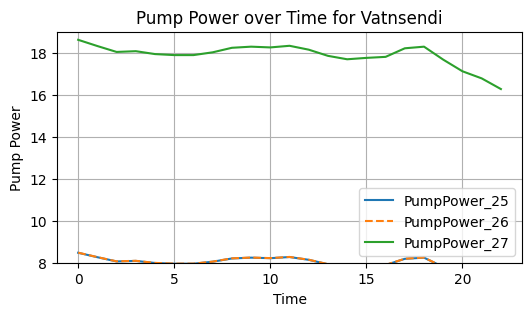

In [32]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_25'], label='PumpPower_25')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_26'], label='PumpPower_26', linestyle='--')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpPower_27'], label='PumpPower_27')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Pump Power")
plt.title("Pump Power over Time for Vatnsendi")
plt.grid(True)
plt.ylim(8,19)

# Display the legend
plt.legend()

# Show the plot
plt.show()


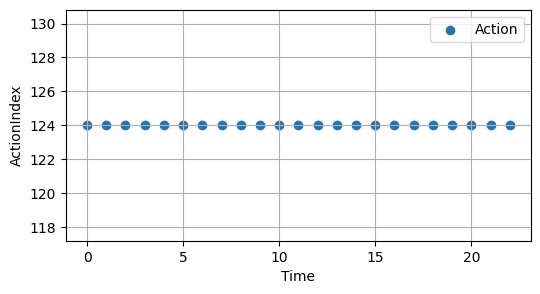

In [33]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.scatter(agent_results_df.index, agent_results_df['ActionIndex'], label='Action')


# Add labels and title
plt.xlabel("Time")
plt.ylabel("ActionIndex")
# plt.title("Pump Power over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()

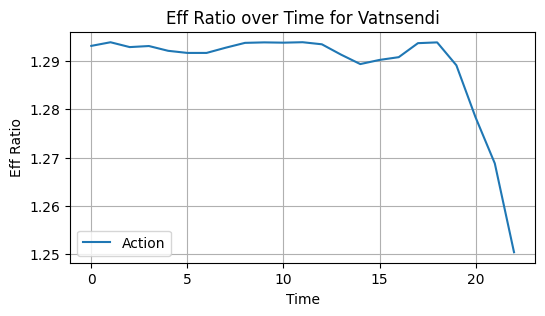

In [34]:

plt.figure(figsize=(6, 3))

# Plot the 'EffRatio' data
plt.plot(agent_results_df.index, agent_results_df['EffRatio'], label='Action')

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Eff Ratio")
plt.title("Eff Ratio over Time for Vatnsendi")
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


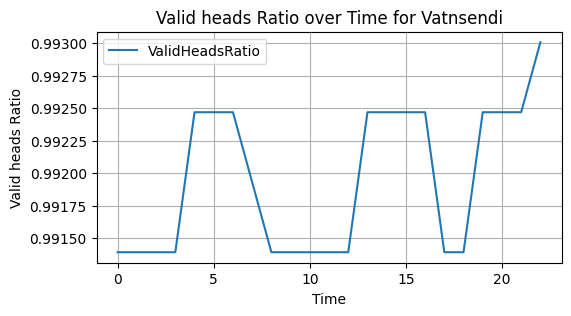

In [35]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['ValidHeadsRatio'], label='ValidHeadsRatio')


# Add labels and title
plt.xlabel("Time")
plt.ylabel("Valid heads Ratio")
plt.title("Valid heads Ratio over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


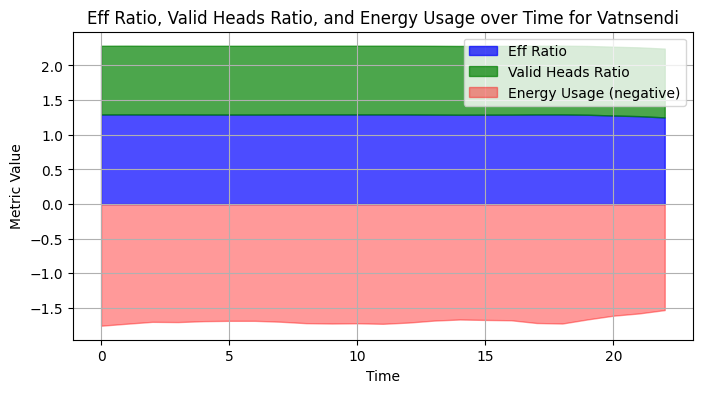

In [36]:
import matplotlib.pyplot as plt

# Create a new column for the sum of EffRatio and ValidHeadsRatio
agent_results_df['Total'] = agent_results_df['EffRatio'] + agent_results_df['ValidHeadsRatio']

plt.figure(figsize=(8, 4))

# Plot the stacked area chart for EffRatio and ValidHeadsRatio
plt.fill_between(agent_results_df.index, 0, agent_results_df['EffRatio'], label='Eff Ratio', color='blue', alpha=0.7)
plt.fill_between(agent_results_df.index, agent_results_df['EffRatio'], agent_results_df['Total'], label='Valid Heads Ratio', color='green', alpha=0.7)

# Plot Energy (negative) below x-axis
plt.fill_between(agent_results_df.index, 0, agent_results_df['Energy'], label='Energy Usage (negative)', color='red', alpha=0.4)

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Metric Value")
plt.title("Eff Ratio, Valid Heads Ratio, and Energy Usage over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


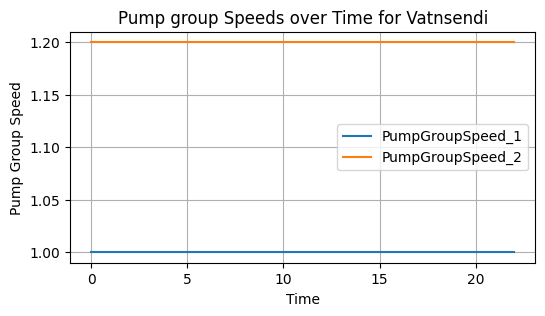

In [37]:

plt.figure(figsize=(6, 3))

# Plot the 'PumpPower_17' data
plt.plot(agent_results_df.index, agent_results_df['PumpGroupSpeed_1'], label='PumpGroupSpeed_1')

# Plot the 'PumpPower_10' data
plt.plot(agent_results_df.index, agent_results_df['PumpGroupSpeed_2'], label='PumpGroupSpeed_2')
# Plot the 'PumpPower_17' data


# Add labels and title
plt.xlabel("Time")
plt.ylabel("Pump Group Speed")
plt.title("Pump group Speeds over Time for Vatnsendi")
plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [38]:
for i in range(len(agent_results_df)):
    print(f"Step {i}  Group 1: {agent_results_df['PumpGroupSpeed_1'][i]},  Group 2: {agent_results_df['PumpGroupSpeed_2'][i]}, Demand scale {agent_results_df['DemandScale'][i]}")


Step 0  Group 1: 1.0,  Group 2: 1.2, Demand scale 1.045780954728453
Step 1  Group 1: 1.0,  Group 2: 1.2, Demand scale 1.02688357571276
Step 2  Group 1: 1.0,  Group 2: 1.2, Demand scale 1.0091200394380084
Step 3  Group 1: 1.0,  Group 2: 1.2, Demand scale 1.0113877249198917
Step 4  Group 1: 1.0,  Group 2: 1.2, Demand scale 1.002694930572673
Step 5  Group 1: 1.0,  Group 2: 1.2, Demand scale 0.9996713499301618
Step 6  Group 1: 1.0,  Group 2: 1.2, Demand scale 0.9996713499301618
Step 7  Group 1: 1.0,  Group 2: 1.2, Demand scale 1.007986196697067
Step 8  Group 1: 1.0,  Group 2: 1.2, Demand scale 1.021592309588366
Step 9  Group 1: 1.0,  Group 2: 1.2, Demand scale 1.024993837811191
Step 10  Group 1: 1.0,  Group 2: 1.2, Demand scale 1.0227261523293074
Step 11  Group 1: 1.0,  Group 2: 1.2, Demand scale 1.0276394708733876
Step 12  Group 1: 1.0,  Group 2: 1.2, Demand scale 1.0159230958836578
Step 13  Group 1: 1.0,  Group 2: 1.2, Demand scale 0.9974036644482788
Step 14  Group 1: 1.0,  Group 2: 1.2,

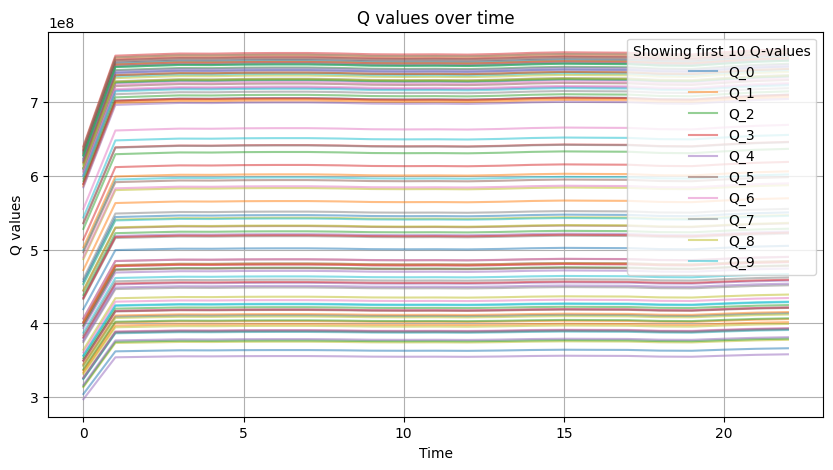

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Loop through all Q-value columns
for i in range(100):
    plt.plot(agent_results_df.index, agent_results_df[f'Q_{i}'], label=f'Q_{i}', alpha=0.5)

# Add labels and title
plt.xlabel("Time")
plt.ylabel("Q values")
plt.title("Q values over time")
plt.grid(True)

# Display legend only for the first few to avoid clutter
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:10], labels[:10], loc='upper right', title='Showing first 10 Q-values')

# Show the plot
plt.show()
